In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [4]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head()

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0
4,1.81,71.0,0,0,0


In [5]:
le = LabelEncoder()
le.fit( data['sex'] )
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

In [6]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Оценка качества

In [7]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [8]:
tp, fp, fn, tn

(1423, 348, 369, 1118)

In [9]:
precision = tp / (tp + fp)
precision

0.8035008469791078

In [10]:
recall = tp / (tp + fn)
recall

0.7940848214285714

In [11]:
fpr = fp/(fp+tn)
fpr

0.2373806275579809

In [12]:
tpr = tp/(tp+fn)
tpr

0.7940848214285714

In [13]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

tpr_all =[]
fpr_all =[]

precision_all = []
recall_all = []

for i in np.arange(0, 1, 0.01):
    for predicted_prob, actual in zip( predictions[:, 1], y_test ):
        if predicted_prob >= i:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
                
    precision = tp / (tp + fp)
    precision_all.append(precision)
    
    recall = tp / (tp + fn)
    recall_all.append(recall)
    
    fpr = fp/(fp+tn)
    tpr = tp/(tp+fn)
    fpr_all.append(fpr)
    tpr_all.append(tpr)
    tp = 0 
    fp = 0 
    fn = 0 
    tn = 0

No handles with labels found to put in legend.


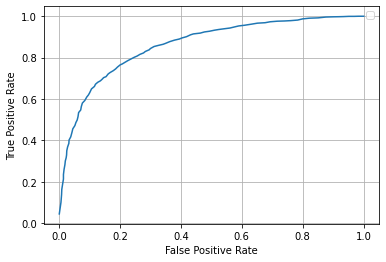

In [14]:
plt.plot( fpr_all, tpr_all )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.grid()
plt.show()

No handles with labels found to put in legend.


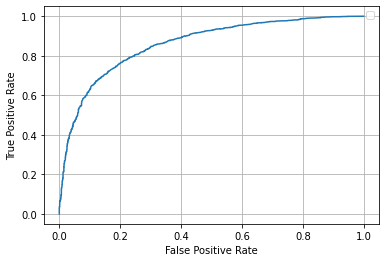

In [15]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])
plt.plot( fpr, tpr )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.grid()
plt.show()

No handles with labels found to put in legend.


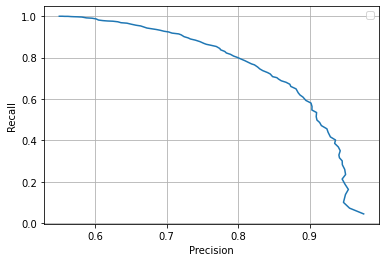

In [16]:
plt.plot( precision_all, recall_all )

plt.xlabel('Precision')
plt.ylabel('Recall')

plt.legend( loc = 0 )
plt.grid()
plt.show()

In [17]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve
pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )
for line in zip( pr[:10], re[:10], thres[:10] ):
    print( line )

(0.556348959950326, 1.0, 0.04737156631456328)
(0.5562111801242235, 0.9994419642857143, 0.04774670111467394)
(0.5569029850746269, 0.9994419642857143, 0.047997049567073)
(0.5570762052877138, 0.9994419642857143, 0.04912670135676476)
(0.5572495332918481, 0.9994419642857143, 0.04932343815800512)
(0.5574229691876751, 0.9994419642857143, 0.04999959642968493)
(0.5575965130759651, 0.9994419642857143, 0.0506845297446241)
(0.5579439252336449, 0.9994419642857143, 0.0509494578348213)
(0.5581177937052041, 0.9994419642857143, 0.051646695696160615)
(0.558465855940131, 0.9994419642857143, 0.053068319336306125)


(0.0, 1.0)

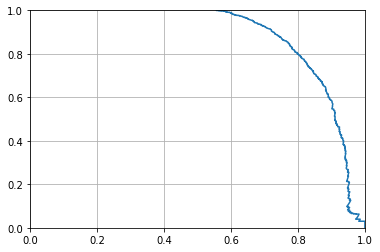

In [18]:
plt.plot(pr,re)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)